In [1]:
# Các thư viện để thực hiện thuật toán
import httpx
from bs4 import BeautifulSoup
import json

In [2]:
# đầu vào (input) là url, đầu ra (output) là trang html của trang page
def get_html_from_url(url):
    with httpx.Client(http2=True) as client:
        response = client.get(url=url)
        return response.text

<!DOCTYPE html>
<html lang="vi" prefix="og: http://ogp.me/ns#">
<head>
<title>Bán gấp căn hộ 75m2 có sổ hồng giá chung cư the Pegasuite 1</title>
<meta name="description" content="Chung cư đã có sổ Quận 8. Địa chỉ: 1002 Tạ Quang Bửu, Phường 6, Quận 8. Khu nhà phố thiết kế phong cách Châu Âu, dân cư đông đúc thân thiện, tiện ích đầy đủ: Cửa hàng ăn uống, siêu thị, hồ bơi,... Căn 75m2 2pn 2wc nhà có nội thất Hướng Đông Bắc mát mẻ, Tầng cao, view nhìn về" />
<meta name="keywords" content />
<meta charset="utf-8" />
<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, viewport-fit=cover, user-scalable=no, shrink-to-fit=no" />
<meta name="HandheldFriendly" content="true">
<meta name="copyright" content="Homedy.com" />
<meta name="author" content="Homedy.com" />
<meta name="owner" content="Homedy.com" />
<meta name="format-detection" content="telephone=no">
<meta property="og:title" content="Bán gấp căn hộ 75m2 có sổ hồng giá chung cư the Pegasuite 1" />
<meta
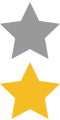
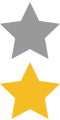
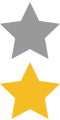
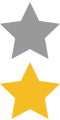

In [3]:
# hiển thị đường dẫn của trang web
html_page = get_html_from_url('https://homedy.com/ban-can-ho-the-pegasuite-i/gap-75m2-co-so-hong-gia-chung-cu-1-es2543253')
print(html_page)

In [5]:
def extract_html_info(html):
    soup = BeautifulSoup(html, 'lxml')

    title = soup.select_one('.product-item .product-detail-top .product-detail-top-left h1').text # tìm kiếm phần tử title được lồng trong các lớp
    address = soup.select_one('.product-item .product-detail-top .product-detail-top-left .address a').text

    address_detail = soup.select('.product-item .product-detail-top .product-detail-top-left .address')
    address_info = {}
    for item in address_detail: # gợi ý 1 danh sách có thể lặp và tìm mã lặp trong tử vd mã lặp ở bên dưới là : thẻ <span>
        kv = item.select('span')

        key1 = 'Pho'
        value1 = kv[0].text
        address_info[key1] = value1

        key2 = 'Phuong'
        value2 = kv[1].text
        address_info[key2] = value2

        key3 = 'Quan'
        value3 = kv[2].text
        address_info[key3] = value3

        key4 = 'ThanhPho'
        value4 = kv[3].text
        address_info[key4] = value4

    # hàm len() dùng để trả về độ dài của đối tượng (như chuỗi, danh sách, tuple, set hoăc từ điển). Độ dài của một đối tượng là số lượng
    # phần tử trong đối tượng 
    short_info = soup.select('.product-item .product-detail-top .product-detail-top-left .short-item')
    if len(short_info) == 2: # kiểm tra độ dài list short_info có bằng 2 hay k 
        price = short_info[0].select_one('strong').text
        price = price.replace('\n', ' ')
        price_2 = short_info[0].select_one('em').text
        price_2 = price_2.replace('\n', ' ')

        area = short_info[1].select_one('strong').text
        area = area.replace('\n', ' ')
    else :
        print("not supported elements", short_info)
        
    # Mô tả
    description_div = soup.select_one('.product-item .content .description-content')
    description_paragraphs = description_div.select('p')

    paragraphs = [p.text for p in description_paragraphs]
    final_description_paragraph = '\n'.join(paragraphs)

    # Product attributes
    product_attributes_div = soup.select_one('.product-item .content .product-attributes')
    product_attributes_items = product_attributes_div.select('.product-attributes--item')

    product_attributes_dict = {}
    for item in product_attributes_items:
        kv = item.select('span')
        key = kv[0].text
        value = kv[1].text
        product_attributes_dict[key] = value

    # nội thất
    interior = soup.select_one('.product-item .content .product-properties')
    interior_info = interior.select('.item')

    info = [item.text for item in  interior_info]
    final_interior_info = ''.join(info)
    

    return {
        'title': title.strip(),
        'address': address.strip(),
        'address_info': address_info,
        'price' : price.strip(),
        'price_2': price_2.strip(),
        'area': area.strip(),
        'description': final_description_paragraph.strip(),
        'product_attributes': product_attributes_dict,
        'interior': final_interior_info.strip(),
    }

In [6]:
extracted_info = extract_html_info(html_page)
print(extracted_info)

{'title': 'Bán gấp căn hộ 75m2 có sổ hồng giá chung cư the Pegasuite 1', 'address': 'Mua bán Căn hộ chung cư The Pegasuite I', 'address_info': {'Pho': 'Phố Tạ Quang Bửu', 'Phuong': 'Phường 6', 'Quan': ' Quận 8', 'ThanhPho': 'TP Hồ Chí Minh'}, 'price': '3,19 Tỷ', 'price_2': '~ 42,53  Triệu/m2', 'area': '75 m2', 'description': 'Chung cư đã có sổ Quận 8.\xa0\nĐịa chỉ: 1002 Tạ Quang Bửu, Phường 6, Quận 8.\xa0\nKhu nhà phố thiết kế phong cách Châu Âu, dân cư đông đúc thân thiện, tiện ích đầy đủ: Cửa hàng ăn uống, siêu thị, hồ bơi,...\xa0\nCăn 75m2 2pn 2wc nhà có nội thất\xa0\nHướng Đông Bắc mát mẻ,\xa0\nTầng cao, view nhìn về trung tâm quận 1\xa0\nĐã có sổ Mua bán công chứng sang tên trong ngày\xa0\nGiá 3.200\xa0\nƯu tiên khách mua tiền mặt', 'product_attributes': {'Loại hình': 'Căn hộ', 'Hướng nhà': 'Đông-Bắc'}, 'interior': 'Bình nóng lạnh\n\n\nMáy hút mùi\n\n\nTủ bếp\n\n\nBàn ăn\n\n\nKệ TV\n\n\nTủ trang trí\n\n\nGiường ngủ\n\n\nTủ quần áo\n\n\nBồn tắm\n\n\nVòi hoa sen\n\n\nBồn cầu\n\n\nBồ

In [7]:
html_page2 = get_html_from_url('https://homedy.com/ban-nha-rieng-thanh-pho-nha-trang-khanh-hoa/phuoc-ha-dong-biet-thu-go-dep-can-hoac-cho-thue-es2146958')
extracted_info2 = extract_html_info(html_page2)
print(extracted_info2)

{'title': 'Phước Hạ, Đồng Biệt thự gỗ đẹp cần bán hoặc cho thuê', 'address': 'Bán Nhà riêng Đường Bình Hòa', 'address_info': {'Pho': 'Bán Nhà riêng Đường Bình Hòa', 'Phuong': 'Xã Phước Đồng', 'Quan': ' Thành phố Nha Trang', 'ThanhPho': 'Khánh Hòa'}, 'price': '6,5 Tỷ', 'price_2': '~ 11,44  Triệu/m2', 'area': '568 m2', 'description': '💎💎💎 Bán hoặc cho thuê Biệt Thự Gỗ Đẹp thôn Phước Hạ, xã Phước Đồng, TP. Nha Trang.\n🛣️🛣️ Đường bê tông 5,5-6m ô tô di chuyển thuận tiện. Khu dân cư yên tĩnh, an ninh, cách Đại lộ Nguyễn Tất Thành hơn 300m. Cách TT xã Phước Đồng chỉ hơn 2km\n\n🌃🌃 Phước Đồng phát triển nhanh vì nằm trên trục đường du lịch nối liền Nha Trang và sân bay Cam Ranh.\n⛳⛳ Vị trí view đẹp nằm sát bên khu du lịch nghỉ dưỡng Diamond Bay, gần sân golf, shophouse, nhà hàng, trung tâm hội nghị Quốc tế và khu Thể thao Tỉnh (QH), Dự án FPT đang có ý tưởng triển khai, Cầu đường đều sắp mở tại Thôn Phước Hạ .v.v.\nKết cấu 1 trệt, 1mê cầu thang và tất cả ốp tường và trần bằng gỗ tốt chất lượng

In [60]:
# html_page3 = get_html_from_url('https://homedy.com/ban-can-ho-the-pegasuite-ii/duplex-3pn-98m2-chung-cu-quan-8-view-dep-gia-chi-3990-es2531923#google_vignette')
# extracted_info3 = extract_html_info(html_page3)
# print(extracted_info3)